# COVID-19 Analysis and Visualization
## Introduction to COVID-19 
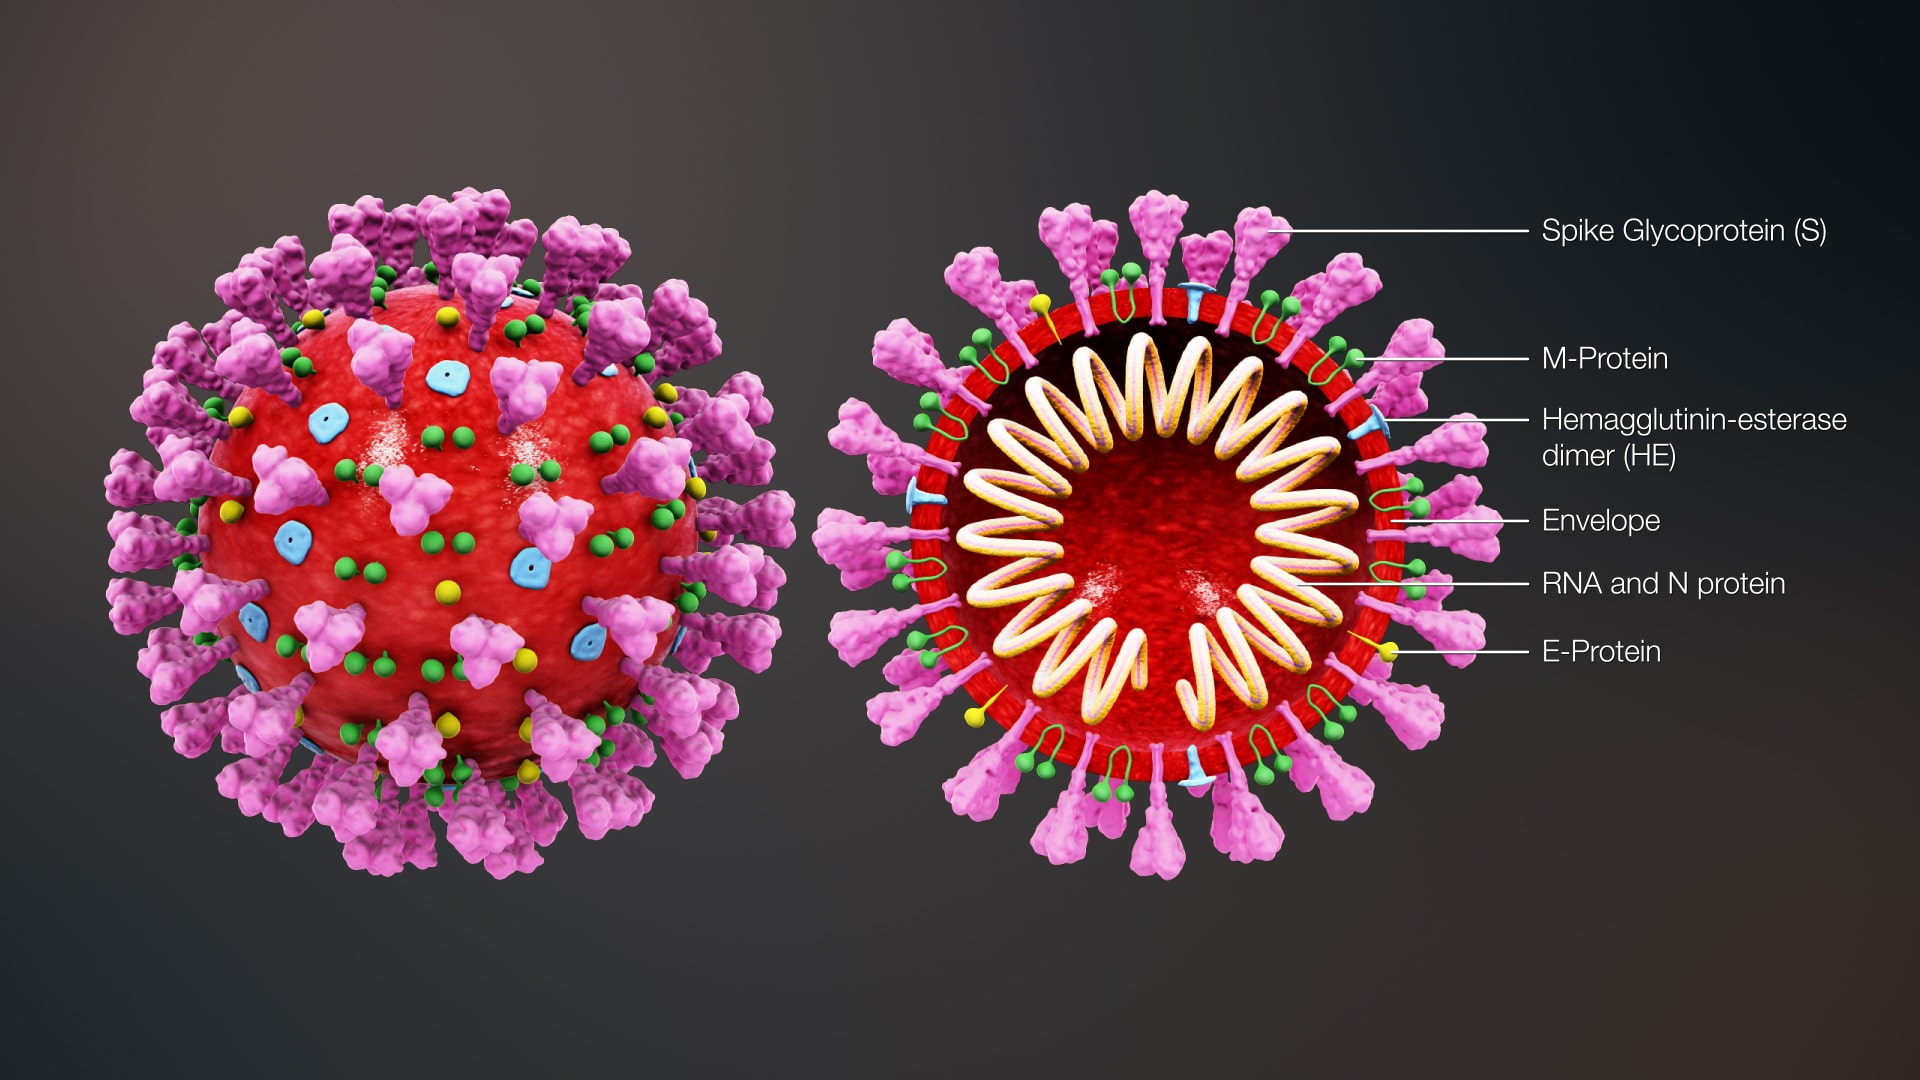

#### Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

#### The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

## **Reading csv data**

In [ ]:
data_df = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv")

## **Converting string Date time into Python Date time object.**

In [ ]:

data_df['Date'] = pd.to_datetime(data_df['Date'],dayfirst=True)
df1=data_df.groupby('Date').sum()
df1.reset_index(inplace=True)


## **Making new columns of Recovery and Death Rate.**

In [ ]:
df1['Recovery_Rate']=df1['Cured']/df1['Confirmed']
df1['Death_Rate']=df1['Deaths']/df1['Confirmed']
df1

In [ ]:
data_df.head(10)

## **Getting different columns**

In [ ]:
data_df.columns.values

## **Printing a concise summary of a DataFrame.**

In [ ]:
data_df.info()

## **Getting some statistical details.**

In [ ]:
data_df.describe()

In [ ]:
data_df.drop('Sno', axis = 1,inplace=True)

## **As the data is cumulative, so printing last 36 values of the data.**

In [ ]:
data_df.tail(36)

## **Total Cured,Deaths and Confirmed values.**

In [ ]:
Total_Cured=print(data_df.iloc[-36:-1]['Cured'].sum())

In [ ]:
Total_Death=print(data_df.iloc[-36:-1]['Deaths'].sum())

In [ ]:
Total_Confirmed=print(data_df.iloc[-36:-1]['Confirmed'].sum())

## **Printing all the different states in a list.**

In [ ]:
#State = len(list(set(data_df['State/UnionTerritory'].values.tolist())))
State = list(set(data_df['State/UnionTerritory'].values.tolist()))
State.sort()
print(State)

In [ ]:
data_df[data_df['State/UnionTerritory']=='Kerala'].tail()

## **Total Cured, Deaths and Confirmed values in each state**

In [ ]:
Cure = data_df.groupby('State/UnionTerritory').max()[['Cured']]

In [ ]:
Death = data_df.groupby('State/UnionTerritory').max()[['Deaths']]

In [ ]:
Confirm = data_df.groupby('State/UnionTerritory').max()[['Confirmed']]

In [ ]:
Cure.head()

In [ ]:
Death.head()

In [ ]:
Confirm.head()

## **Visualizing Cured values for different states**

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.bar(x=np.arange(1,38),height=Cure['Cured'],color='green')
plt.xticks(np.arange(1,38),State, rotation=90)
plt.xlabel('States') 
# naming the y axis 
plt.ylabel('Cured') 
  
# giving a title to my graph 
plt.title('Cured Cases')

## **Visualizing Death values for different states.**

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.bar(x=np.arange(1,38),height=Death['Deaths'],color='red')
plt.xticks(np.arange(1,38),State, rotation=90)
plt.xlabel('States') 
# naming the y axis 
plt.ylabel('Deaths') 
  
# giving a title to my graph 
plt.title('Death Cases')

## **Visualizing Confirmed values for different states**

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.bar(x=np.arange(1,38),height=Confirm['Confirmed'])
plt.xticks(np.arange(1,38),State, rotation=90)
plt.xlabel('States') 
# naming the y axis 
plt.ylabel('Confirm') 
  
# giving a title to my graph 
plt.title('Confirmed Cases')

## **Visualizing Confirmed values for different states in a pie chart**

In [ ]:
fig = plt.figure(figsize=(13,13))
conf_per_state = data_df.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending=False)
conf_sum=Total_Confirmed#last rows sum
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_state.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

## **Visualizing Death values for different states in a pie chart**

In [ ]:
fig = plt.figure(figsize=(13,13))

death_per_state = data_df.groupby('State/UnionTerritory')['Deaths'].max().sort_values(ascending=False)

death_sum=Total_Death #last rows sum
def absolute_value(val):
    a  = val
    return (np.round(a,2))
death_per_state.plot(kind="pie",title='Percentage of death cases per country',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

## **Visualizing Cured values for different states in a pie chart**

In [ ]:
fig = plt.figure(figsize=(13,13))

cured_per_state = data_df.groupby('State/UnionTerritory')['Cured'].max().sort_values(ascending=False)

cured_sum=Total_Cured #last rows sum
def absolute_value(val):
    a  = val
    return (np.round(a,2))
cured_per_state.plot(kind="pie",title='Percentage of cured cases per country',autopct=absolute_value,startangle=7)
plt.legend(loc=1, ncol = 7)
plt.show()

In [ ]:
group_cases=data_df[['Confirmed','Cured','Deaths','State/UnionTerritory']].groupby('State/UnionTerritory').max().sort_values('Confirmed',ascending=False).head(34)
group_cases=group_cases.reset_index()
group_cases

## **Visualizing Confirmed, Cured and Death cases for different states combinedly.**

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="State/UnionTerritory",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Cured", y="State/UnionTerritory", data=group_cases,
            label="Cured", color="g")


bar3=sns.barplot(x="Deaths", y="State/UnionTerritory", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Total Cases")
plt.show()

In [ ]:
india_province_cases=data_df[['Confirmed','Cured','Deaths','State/UnionTerritory']].groupby('State/UnionTerritory').max().sort_values('Confirmed',ascending=False)
india_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(20,6))
plt.show()

## **Visualizing total cases in India according to dates **

In [ ]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();

## **Recovery rate and Date Rate in India**

In [ ]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Rate',fontsize = 20)
plt.title("Recovery and Death Rate in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Recovery_Rate',x= 'Date',label = 'Recovery_rate',linestyle ='-',color = 'g')
ax2 = plt.plot_date(data=df1,y= 'Death_Rate',x= 'Date',label = 'Death_rate',linestyle ='-',color = 'r')

plt.legend();

## ***Please Upvote if you liked it.***